1. Reading data from a file and outputting information about A/B test results:
- Number of users in groups A and B, respectively;
- The number of conversions in groups A and B, respectively;
- The conversion rate in groups A and B, respectively;
- The start date and end date of the test, as well as the duration of the test in days.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

test_data = pd.read_csv('D:\Vitaliy\Study\Data Analitycs\AB Testing\p_ab_test_data.csv')
test_data['timestamp'] = pd.to_datetime(test_data['timestamp'])
test_groups = test_data.groupby('test_group').agg(Users_number=('test_group','count'), Conversions_number=('conversion','sum'), Conversion_rate=('conversion', 'mean'), Start_date = ('timestamp', 'min'), End_date = ('timestamp', 'max') ) 
test_groups['Duration_in_days'] = (test_data['timestamp'].dt.date.max() - test_data['timestamp'].dt.date.min()).days
test_groups.head()

,Users_number,Conversions_number,Conversion_rate,Start_date,End_date,Duration_in_days
test_group,,,,,,
a,10013,611,0.061021,2023-07-03 01:46:14.688840,2023-07-25 01:41:19.152664,22
b,9985,889,0.089034,2023-07-03 01:42:34.033708,2023-07-25 01:35:59.130658,22


In [34]:
test_data.describe()

,conversion
count,19998.000000
mean,0.075008
std,0.263410
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [35]:
test_data.describe(include='all')

,user_id,timestamp,test_group,conversion
count,19998,19998,19998,19998.000000
unique,19998,19998,2,NaN
top,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,NaN
freq,1,1,10013,NaN
mean,NaN,NaN,NaN,0.075008
std,NaN,NaN,NaN,0.263410
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,0.000000


2. Selection of statistical criteria for hypothesis testing, calculation of statistics and p-value. Checking whether we can reject the null hypothesis.

Student's t-test:

In [61]:
from scipy import stats

alpha = 0.05

statistic, pvalue = stats.ttest_ind(test_data[test_data['test_group'] == 'a']['conversion'],
                                    test_data[test_data['test_group'] == 'b']['conversion'], 
                                    alternative='less')

print(f't-statistic: {round(statistic, 2)}, p-value: {round(pvalue, 2)}')

if pvalue < alpha:
    print('The difference is statistically significant, Null Hypothesis is rejected.')
else:
    print('The difference is insignificant, Null Hypothesis cannot rejected.')

t-statistic: -7.53, p-value: 0.0
The difference is statistically significant, Null Hypothesis is rejected.


Permutation test:

In [64]:
from scipy import stats

def statistic(x, y):
    return stats.ttest_ind(x, y).statistic

alpha = 0.05
    
x = test_data[test_data['test_group'] == 'a']['conversion']
y = test_data[test_data['test_group'] == 'b']['conversion']

results = stats.permutation_test((x, y), statistic, n_resamples=100)

print(f'statistic: {round(results.statistic, 2)}, p-value: {round(results.pvalue, 2)}')

if results.pvalue < alpha:
    print('The difference is statistically significant, Null Hypothesis is rejected.')
else:
    print('The difference is insignificant, Null Hypothesis cannot rejected.')


statistic: -7.53, p-value: 0.02
The difference is statistically significant, Null Hypothesis is rejected.


3. Visualization plot for comparison of mean values in groups with 95% confidence intervals

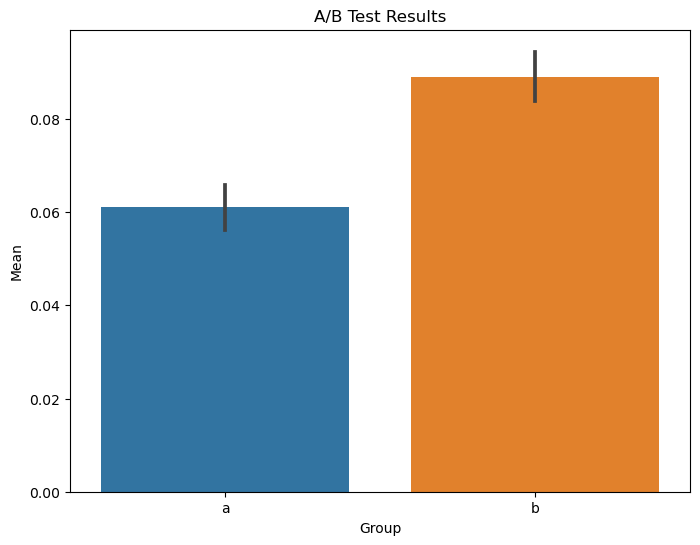

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=test_data['test_group'], 
            y=test_data['conversion'], 
            errorbar=('ci', 95)) # Confidence Intervals

plt.title('A/B Test Results')
plt.xlabel('Group')
plt.ylabel('Mean')

plt.show()

4. Plotting a graph showing the change in conversion over time

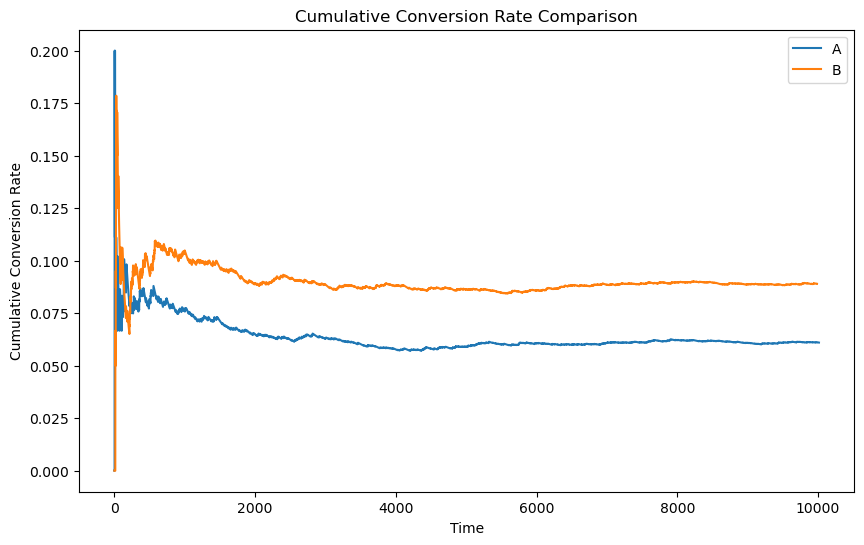

In [66]:
cumulative_metric_a = test_data[test_data['test_group'] == 'a']['conversion'].expanding().mean().reset_index(drop=True)
cumulative_metric_b = test_data[test_data['test_group'] == 'b']['conversion'].expanding().mean().reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_metric_a, label='A')
plt.plot(cumulative_metric_b, label='B')

plt.title('Cumulative Сonversion Rate Comparison')
plt.xlabel('Time')
plt.ylabel('Cumulative Сonversion Rate')

plt.legend()
plt.show()